In [3]:
import pandas as pd

df = pd.read_parquet('yellow_tripdata_2022-01.parquet')

In [4]:
len(df.columns)

19

In [5]:
df['trip_duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime)/ pd.Timedelta(minutes=1)

In [6]:
df.trip_duration.describe()['std']

46.44530513776499

c:\Users\brunocaraffa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

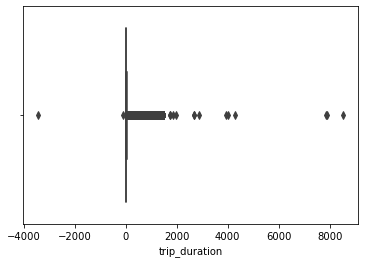

In [7]:
import seaborn as sns

sns.boxplot(df.trip_duration)

In [8]:
df_filtered = df.loc[(df['trip_duration'] > 1) & (df['trip_duration'] <60)]

c:\Users\brunocaraffa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

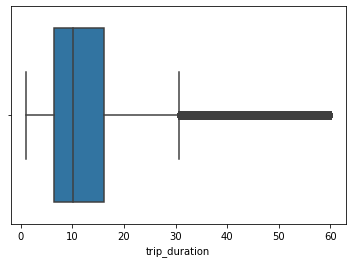

In [9]:
sns.boxplot(df_filtered.trip_duration)

In [10]:
df_filtered.shape[0]/df.shape[0]

0.9825883922885827

In [12]:
df = df_filtered

In [13]:
cat = ['PULocationID','DOLocationID']

In [14]:
df[cat] = df[cat].astype(str)
train_dicts = df[cat].to_dict(orient='records')

In [15]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [17]:
X_train.shape[1]

515

In [18]:
target = 'trip_duration'
y_train = df[target].values

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_train)

In [21]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred,y_train,squared=False)

6.983870170141645

In [25]:
df_val = pd.read_parquet('yellow_tripdata_2022-02.parquet')
df_val['trip_duration'] = (df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime)/ pd.Timedelta(minutes=1)
df_val = df_val.loc[(df_val['trip_duration'] > 1) & (df_val['trip_duration'] <60)]

In [27]:
df_val[cat] = df_val[cat].astype(str)
val_dicts = df_val[cat].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_val[target].values
y_pred_val = lr.predict(X_val)
mean_squared_error(y_pred_val,y_val,squared=False)

7.784408082885057